<div style="direction:rtl">
    <h1> רקע </h1>
    <a href="https://aws.amazon.com/rekognition/">Amazon Rekognition</a> הוא שירות שמאפשר להוסיף יכולות מתקדמות של עיבוד תמונה ועיבוד וידאו לשפע אפליקציות, בעזרת קוד פשוט! 
</br></br>
אם היינו רוצים לייצר מודלים כאלו בעצמנו, מעבר לבחירת ארכיטקטורת רשת מתאימה, היינו זקוקים לכמויות אדירות של דאטא מתויג – למשל אם היינו רוצים לזהות אובייקטים בתמונה, היינו צריכים לסמן בתמונות לצורך אימון הרשת מלבן (bounding box) מסביב לכל אובייקט שאנחנו רוצים לזהות ולציין מאיזה סוג הוא (label), ולאחר מכן היינו צריכים לאמן את המודל על הדאטא המדובר – דבר שהיה לוקח זמן רב ומשאבי מחשוב רבים.

<div style="direction:rtl">
</br></br>
באמצעות Amazon Rekognition ניתן לזהות אובייקטים, אנשים, טקסט, סצנות, פעילויות שונות ותוכן לא ראוי, וכל זאת בצורה אוטומטית, ללא צורך ביצירת מודלי machine learning משלנו. מעבר לכך, ניתן להשתמש ב- Amazon Rekognition אפילו לניתוח פנים ולחיפוש פנים במאגר. 
</br></br>
דמיינו כמה אפליקציות ניתן ליצור שמשתמשות ביכולות האלה. כך למשל ניתן לספור אילו סטודנטים הגיעו לשיעור והאם הם היו יותר שמחים בתחילת השיעור או בסופו.

  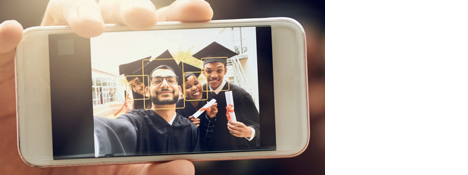

<div style="direction:rtl"> 
</br></br>עולה השאלה – מה אם תרצו לזהות משהו חדש? למשל אם תרצו לזהות חפצים מסוימים בצורה אוטומטית? כאן Amazon Rekognition Custom Labels נכנסת לתמונה. באמצעות היכולת האת, תוכלו לאמן מודל בפשטות על מידע שמעניין אותכם וכך למעשה לשדרג את האפליקציות שאתם בונים. כל מה שדרוש זה תמונות לפי הקטגוריות (labels) שמעניינות אותכם ו- Amazon Rekognition ידאג לכל השאר.

<div style="direction:rtl">
    <h1> Hands on </h1>
ה- jupyter notebook הזה הוא חלק מהשירות  <a href="https://aws.amazon.com/sagemaker/">SageMaker</a> שמאפשר פיתוח ומחקר machine learning מקצה לקצה.


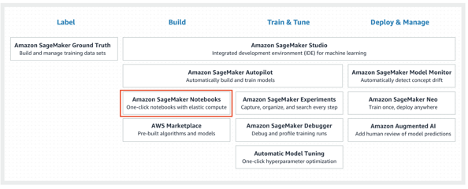

<div style="direction:rtl">
ראשית, שימו לב שה- kernel בצד ימין למעלה הוא conda_python3 על מנת שתוכלו להריץ את התאים ב- notebook בהצלחה.
</br></br>
על מנת להריץ את התאים תוכלו ללחוץ על התא הרלוונטי וללחוץ על כפתור ״הרץ״ בתפריט העליון, או לחלופין ללחוץ על התא הרלוונטי ולהשתמש בקיצור המקלדת shift enter.
</br></br>

In [1]:
import boto3
from IPython.display import Image

<div style="direction:rtl"> 
</br></br>
הכנסו לאתר     <a href="https://thispersondoesnotexist.com">https://thispersondoesnotexist.com</a>
</br></br>
באתר תראו תמונה של אדם. התמונה הזאת יוצרה על ידי machine learning.
</br></br>
בפועל האדם הזה לא קיים!  תוכלו לרפרש את העמוד כדי לקבל כל פעם תמונה של אדם לא קיים חדש.
</br></br>
הורידו משם תמונה של פנים למחשב שלכם ותנו לה שם נוח והעלו אותה לצד ה- notebook.

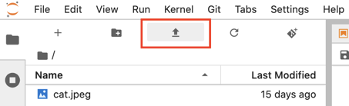

<div style="direction:rtl"> 
</br></br>
שנו את שם התמונה לשם התמונה שהעלתם והריצו את התא בשביל להציג אותה.

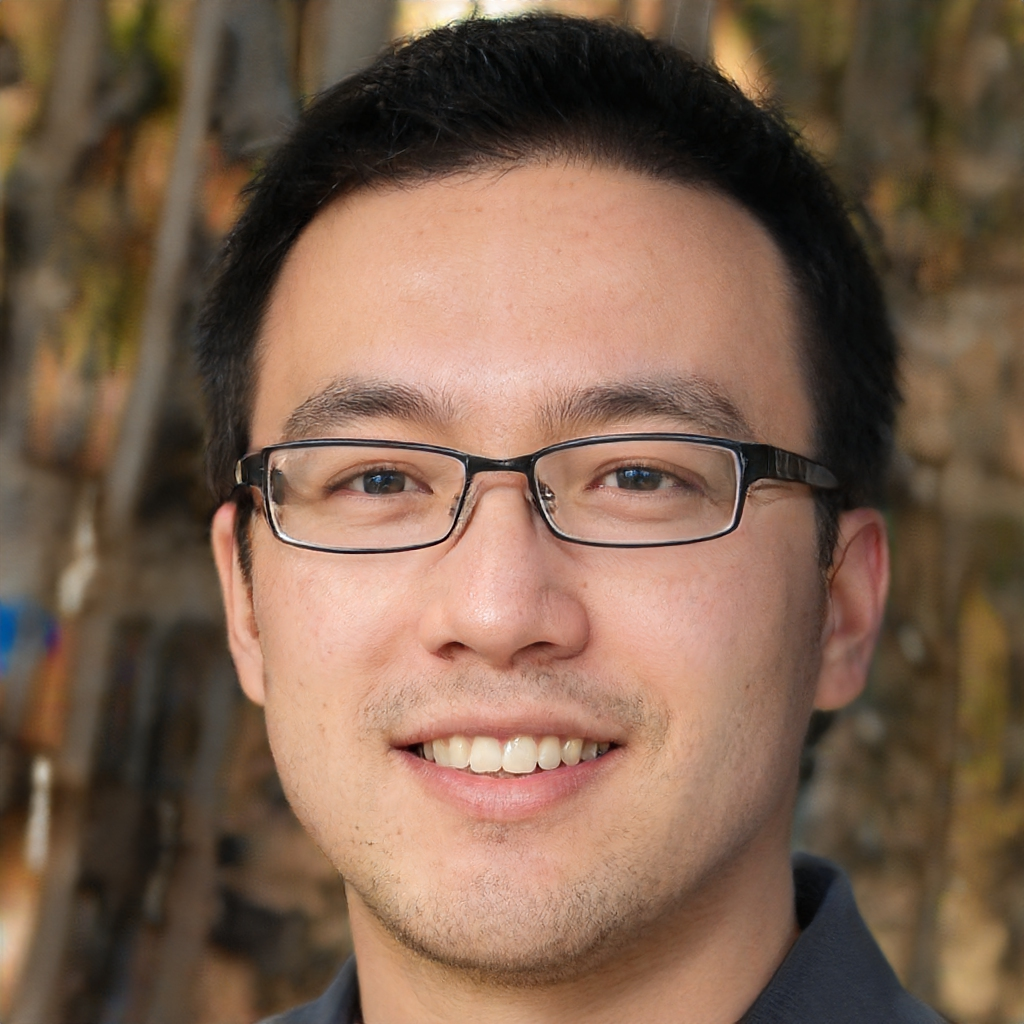

In [2]:
image_name = 'generated_person.jpeg' #insert your image path here
Image(filename = image_name, width = 300, height = 300) 

<div style="direction:rtl"> 
</br></br>
על מנת להשתמש ב- Amazon Rekognition נשתמש בספריה boto3 שמאפשרת התממשקות נוחה בפייתון לשירותים של AWS.
</br></br>
נקרא את התמונה שהעלנו ונשתמש בה כקלט לפונקציה detect_faces של Amazon Rekognition.
</br></br>
הפונקציה הזו מחזירה פרמטרים שונים.
</br></br>

In [3]:
client = boto3.client('rekognition')

with open(image_name, 'rb') as image:
    img_bytes = image.read()
    
face_detection_response = client.detect_faces(Image={
    'Bytes': img_bytes
 }, Attributes=['ALL'])
    

<div style="direction:rtl"> 
</br></br>
אחד מהם למשל הוא אילו רגשות הפנים בתמונה מביעות.
</br></br>
הריצו את התא הבא כדי להדפיס את הרגשות המובעים בתמונה.
</br></br>
כל emotion הוא למעשה dict בפייתון שמכיל את סוג הרגש (Type) ואת מידת הוודאות של המודל שהרגש הזה מובע בתמונה (Confidence).
</br>
ככל שהציון קרוב יותר ל- 100, רמת הבטחון של המודל שהרגש אכן מופיע גבוהה יותר.

In [4]:
emotions = face_detection_response['FaceDetails'][0]['Emotions']
for emotion in emotions:
    print(emotion)

{'Type': 'HAPPY', 'Confidence': 98.98298645019531}
{'Type': 'SURPRISED', 'Confidence': 0.4414089024066925}
{'Type': 'CALM', 'Confidence': 0.25077131390571594}
{'Type': 'DISGUSTED', 'Confidence': 0.1383233517408371}
{'Type': 'ANGRY', 'Confidence': 0.06493978947401047}
{'Type': 'CONFUSED', 'Confidence': 0.05814889445900917}
{'Type': 'FEAR', 'Confidence': 0.04909742251038551}
{'Type': 'SAD', 'Confidence': 0.014327551238238811}


<div style="direction:rtl"> 
</br></br>
תרגיל:
</br></br>
כתבו פונקציה שמקבלת כקלט את הרגשות המובעות בתמונה ומחזירה רק רגשות שה- confidence שלהם גדול מ- 80.
</br></br>
בדקו שהפונקציה עובדת.

In [5]:
def get_high_confidence_emotions(emotions):
    high_confidence_emotions = []
    #TODO: insert your code here
    return high_confidence_emotions

In [6]:
high_confidence_emotions = get_high_confidence_emotions(emotions)
print(high_confidence_emotions)

[]


<div style="direction:rtl"> 
</br></br>
תרגיל:
</br></br>
הדפיסו את face_detection_response וכתבו פונקציה שמחזירה האם לאדם בתמונה יש שפם.
</br></br>
רמז: איזה פרמטר רלוונטי יצא לכם בהדפסה?

In [7]:
face_detection_response

{'FaceDetails': [{'BoundingBox': {'Width': 0.5374994277954102,
    'Height': 0.7877377271652222,
    'Left': 0.24088874459266663,
    'Top': 0.14846423268318176},
   'AgeRange': {'Low': 22, 'High': 34},
   'Smile': {'Value': True, 'Confidence': 98.62922668457031},
   'Eyeglasses': {'Value': True, 'Confidence': 99.83747100830078},
   'Sunglasses': {'Value': False, 'Confidence': 97.81021881103516},
   'Gender': {'Value': 'Male', 'Confidence': 99.96234130859375},
   'Beard': {'Value': False, 'Confidence': 59.67874526977539},
   'Mustache': {'Value': False, 'Confidence': 98.28890228271484},
   'EyesOpen': {'Value': True, 'Confidence': 99.99149322509766},
   'MouthOpen': {'Value': True, 'Confidence': 99.29191589355469},
   'Emotions': [{'Type': 'HAPPY', 'Confidence': 98.98298645019531},
    {'Type': 'SURPRISED', 'Confidence': 0.4414089024066925},
    {'Type': 'CALM', 'Confidence': 0.25077131390571594},
    {'Type': 'DISGUSTED', 'Confidence': 0.1383233517408371},
    {'Type': 'ANGRY', 'Confi

In [8]:
def has_mustache(face_detection_response):
    #TODO: insert your code here
    return True

In [9]:
print(has_mustache(face_detection_response))

True


<div style="direction:rtl"> 
</br></br>
הכנסו ל- console בעמוד חדש - <a href="http://console.aws.amazon.com">http://console.aws.amazon.com</a>
</br></br>
בשורת החיפוש הקלידו recognition. 

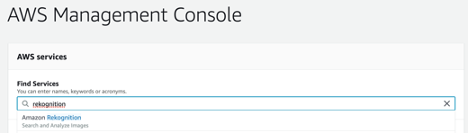

<div style="direction:rtl"> 
</br></br>
בעמוד של Amazon Rekognition תוכלו למצוא מספר דוגמאות שמציגות את צורת השימוש במספר אופציות ש- Amazon Rekognition מציעה.
</br></br>
בחרו בצד שמאל את האופציה ״Text in image״ תחת “Demos”.

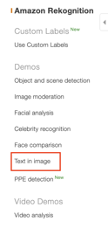

<div style="direction:rtl"> 
</br></br>
בצד ימין הסתכלו מה מבנה הבקשה לשירות (request) ומה מבנה התשובה שהשירות מחזיר (response).

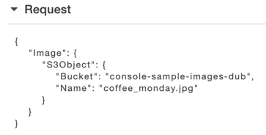

<div style="direction:rtl"> 
</br></br>
ניתן לראות שב- request מופיע S3Object.
</br>
S3 הוא שירות ב- AWS שמאפשר שמירה של קבצים מסוגים שונים בענן.
</br>
הקבצים ב- S3 נשמרים ב- buckets - מקום שבו ניתן לשמור קבצים ששייכים לאותה קבוצה לוגית.
</br></br>
בתרגיל הקודם העלנו את התמונה של הפנים ידנית לצד ה- notebook, אך יכולנו באותה מידה להשתמש ב- S3 לשמירת התמונה. בתרגיל הבא נתנסה ב- S3. 

<div style="direction:rtl"> 
</br></br>
למה בכלל להשתמש ב- S3?
</br>
המקום בשרת שה- notebook נמצא בו מוגבל.
</br>
אם היו לנו תמונות רבות שהיינו רוצים לנתח, היינו רוצים שירות storage, שהוא נוח לשימוש, שנותן שירות טוב ביחס לעלות שלו, ושנוכל לשים בו קבצים כרצוננו, מבלי לדאוג שיגמר לנו המקום בשרת.
</br>
S3 הוא בדיוק השירות שחיפשנו.
</br></br>
הכנסו לדוקומנטציה של boto3, הספריה שבה נעזרנו כדי להשתמש ביכולות של Amazon Rekognition -
</br></br>

<a href="https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/rekognition.html?highlight=rekognition#Rekognition.Client.detect_text">https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/rekognition.html?highlight=rekognition#Rekognition.Client.detect_text</a>

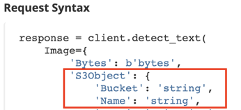

<div style="direction:rtl"> 
</br></br>
נסתכל על הפונקציה detect_text, שתאפשר לנו לזהות טקסט באנגלית מתוך תמונה, במקום להקליד אותו בעצמנו.
</br></br>
נשים לב ל- request syntax ולכך ש- Image הוא הפרמטר הדרוש היחיד (השאר לא חובה).

<div style="direction:rtl"> 
</br></br>
תרגיל:
</br></br>
בעזרת הדוקומנטציה והקוד הקודם, כתבו פונקציה שמקבלת שם של תמונה ואת שם ה- bucket ב- S3 שבה היא נמצאת.  הפונקציה תדפיס את הטקסט שיש בתמונה.
</br>
הכנסו ל- S3 (תוכלו לעשות זאת כפי שנכנסנו לשירות של Amazon Rekognition) והעלו תמונה ל- bucket שלכם.
</br>
תוכלו להוריד את התמונה monday.jpg למחשב האישי שלכם, ולהעלות אותה ל- bucket.
</br>
שמרו את שם התמונה ושם ה- bucket והשתמשו בהם על מנת לבחון את הפונקציה שלכם!

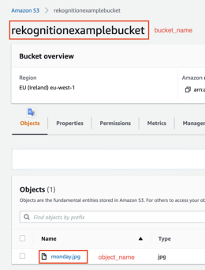

In [10]:
def detect_text_from_s3(s3_bucket_name, s3_image_name):
    #TODO: insert your code here
    text = 'text'
    return text

In [11]:
s3_bucket_name = 'insert here s3 bucket name'
s3_image_name = 'insert here s3 image name'
print(detect_text_from_s3(s3_bucket_name, s3_image_name))

text
